<a href="https://colab.research.google.com/github/Saurav-Somani/SNA-Project/blob/main/SNA_Round_1_roadnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/My Drive/SNA Project/roadNet-TX.txt"

In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)

In [5]:
sample = random.sample(res, 10000)
filename=open('data1.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
G = nx.read_edgelist(path,nodetype=int,create_using=nx.Graph())
#print(nx.info(G))

In [7]:
G1 = nx.read_edgelist('data1.txt',nodetype=int,create_using=nx.Graph())

Text(0, 0.5, 'Frequency')

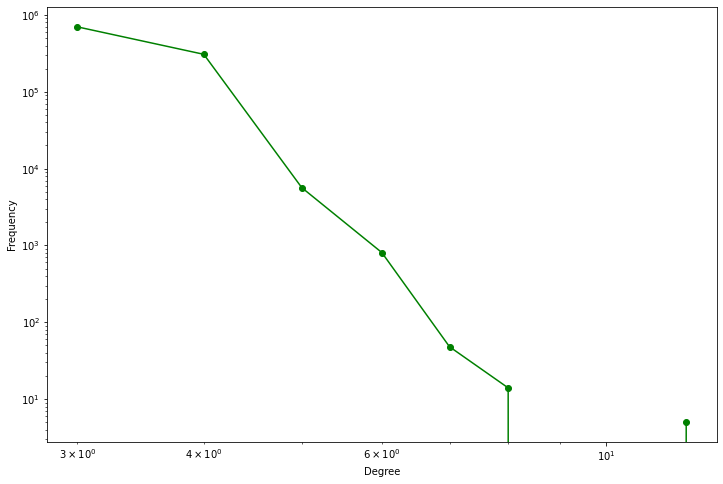

In [8]:
m=3
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [9]:
print("Maximum degree of node is",len(degree_freq)-1)

Maximum degree of node is 12


In [10]:
cnt=0
sum=0
cnt_nodes=0
for d in degree_freq:
        sum = sum + d*cnt
        cnt = cnt + 1
        cnt_nodes = cnt_nodes + d

#cnt_nodes
#print(sum)
avg_degree = sum/cnt_nodes
avg_degree

2.785182007323629

In [11]:
cnt=0
sum=0

for d in degree_freq:
        sum = sum + d*((cnt - avg_degree)**2)
        cnt = cnt + 1


std_dev_in = (sum/cnt_nodes)**0.5
std_dev_in

1.0054590833689947

# **Centrality Measures**

**Degree Centrality**

In [14]:

DegreeCentrality = nx.degree_centrality(G1)
DegreeCentrality



{365233: 2.6231572320444888e-05,
 365273: 2.6231572320444888e-05,
 1134224: 2.6231572320444888e-05,
 1134225: 2.6231572320444888e-05,
 438431: 2.6231572320444888e-05,
 438432: 2.6231572320444888e-05,
 445705: 2.6231572320444888e-05,
 445718: 2.6231572320444888e-05,
 123873: 2.6231572320444888e-05,
 123874: 2.6231572320444888e-05,
 773090: 2.6231572320444888e-05,
 773313: 2.6231572320444888e-05,
 1088320: 2.6231572320444888e-05,
 1088603: 2.6231572320444888e-05,
 866313: 2.6231572320444888e-05,
 866309: 2.6231572320444888e-05,
 1291077: 2.6231572320444888e-05,
 1290910: 2.6231572320444888e-05,
 1131365: 2.6231572320444888e-05,
 1131363: 2.6231572320444888e-05,
 457805: 2.6231572320444888e-05,
 457804: 2.6231572320444888e-05,
 122558: 5.2463144640889776e-05,
 122553: 2.6231572320444888e-05,
 40133: 2.6231572320444888e-05,
 1335238: 2.6231572320444888e-05,
 928054: 2.6231572320444888e-05,
 928261: 2.6231572320444888e-05,
 1273233: 2.6231572320444888e-05,
 1273239: 2.6231572320444888e-05,


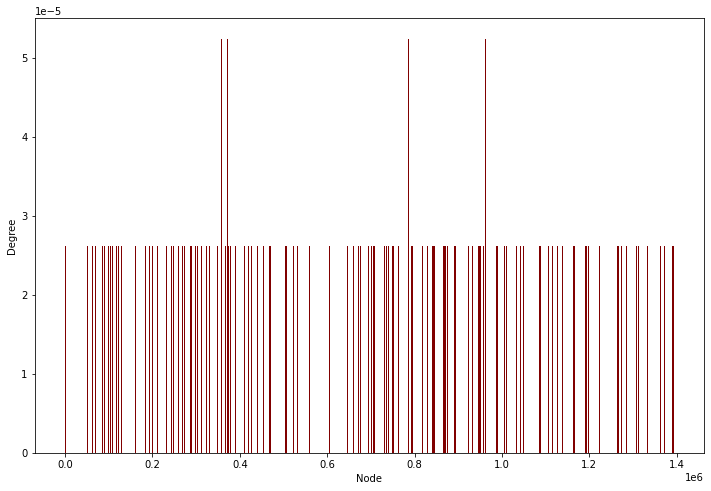

In [15]:
plt.figure(figsize=(12, 8)) 
key = list(DegreeCentrality.keys());
value = list(DegreeCentrality.values());
plt.bar(key,value, color ='maroon',width=10) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [16]:
print("Maximum value of Degree Centrality is",max(DegreeCentrality.values()))

Maximum value of Degree Centrality is 5.2463144640889776e-05


**Eigen Vector Centrality**

In [17]:
eigenVectorCentrality = nx.eigenvector_centrality_numpy(G1)
eigenVectorCentrality

{365233: -1.6535012255887059e-18,
 365273: -1.5437997743537019e-18,
 1134224: 7.290434010771543e-18,
 1134225: 3.175192530530066e-18,
 438431: 6.829734436527387e-19,
 438432: 1.0807951281364776e-18,
 445705: 3.3481978158436363e-18,
 445718: -8.692318449456286e-18,
 123873: -4.635965604079267e-19,
 123874: 2.106031312955455e-19,
 773090: -4.394377866281279e-18,
 773313: -6.766877990444595e-18,
 1088320: 5.1045407717963715e-18,
 1088603: 4.5614071429850095e-18,
 866313: -4.253158188123087e-18,
 866309: 1.3865699314562115e-18,
 1291077: 3.2467470159421204e-19,
 1290910: 3.63228911737539e-18,
 1131365: -1.4013472637125587e-18,
 1131363: -1.6663080579748529e-18,
 457805: -1.6437063813574017e-18,
 457804: 3.1699917909507236e-18,
 122558: 0.09952010384017244,
 122553: 0.06150680673714551,
 40133: 1.4657136831736961e-18,
 1335238: 1.4831779079065245e-18,
 928054: 2.3028917126089816e-18,
 928261: 8.440516227279178e-19,
 1273233: -3.659204368001331e-18,
 1273239: 2.747078805424642e-18,
 1277696:

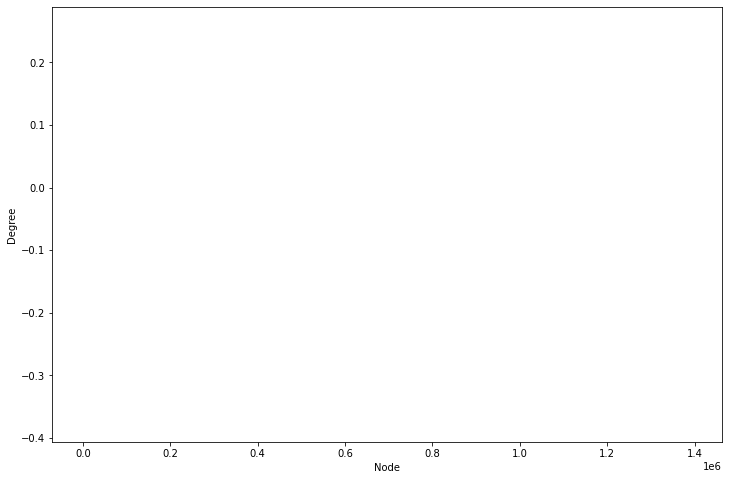

In [18]:
plt.figure(figsize=(12, 8)) 
key = list(eigenVectorCentrality.keys());
value = list(eigenVectorCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [19]:
print("Maximum value of eigenVector Centrality is",max(eigenVectorCentrality.values()))

Maximum value of eigenVector Centrality is 0.256751878688218


**Katz Centrality**

In [20]:
katzCentrality = nx.katz_centrality(G1,max_iter=10000)
katzCentrality

{365233: 0.005114700641326214,
 365273: 0.005114700641326214,
 1134224: 0.005114700641326214,
 1134225: 0.005114700641326214,
 438431: 0.005114700641326214,
 438432: 0.005114700641326214,
 445705: 0.005114700641326214,
 445718: 0.005114700641326214,
 123873: 0.005114700641326214,
 123874: 0.005114700641326214,
 773090: 0.005114700641326214,
 773313: 0.005114700641326214,
 1088320: 0.005114700641326214,
 1088603: 0.005114700641326214,
 866313: 0.005114700641326214,
 866309: 0.005114700641326214,
 1291077: 0.005114700641326214,
 1290910: 0.005114700641326214,
 1131365: 0.005114700641326214,
 1131363: 0.005114700641326214,
 457805: 0.005114700641326214,
 457804: 0.005114700641326214,
 122558: 0.005689383142990792,
 122553: 0.005172167372426565,
 40133: 0.005114700641326214,
 1335238: 0.005114700641326214,
 928054: 0.005114700641326214,
 928261: 0.005114700641326214,
 1273233: 0.005114700641326214,
 1273239: 0.005114700641326214,
 1277696: 0.005114700641326214,
 1276735: 0.0051147006413262

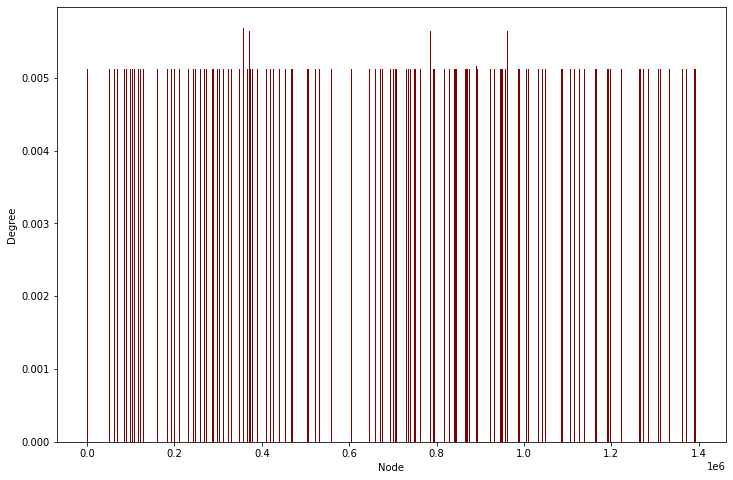

In [21]:
plt.figure(figsize=(12, 8)) 
key = list(katzCentrality.keys());
value = list(katzCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [22]:
print("Maximum value of Katz Centrality is",max(katzCentrality.values()))

Maximum value of Katz Centrality is 0.005689383142990792


**Page Rank Centrality**

In [23]:
pageRankCentrality = nx.pagerank(G1, max_iter = 10000)
pageRankCentrality

{365233: 2.6230884243107834e-05,
 365273: 2.6230884243107834e-05,
 1134224: 2.6230884243107834e-05,
 1134225: 2.6230884243107834e-05,
 438431: 2.6230884243107834e-05,
 438432: 2.6230884243107834e-05,
 445705: 2.6230884243107834e-05,
 445718: 2.6230884243107834e-05,
 123873: 2.6230884243107834e-05,
 123874: 2.6230884243107834e-05,
 773090: 2.6230884243107834e-05,
 773313: 2.6230884243107834e-05,
 1088320: 2.6230884243107834e-05,
 1088603: 2.6230884243107834e-05,
 866313: 2.6230884243107834e-05,
 866309: 2.6230884243107834e-05,
 1291077: 2.6230884243107834e-05,
 1290910: 2.6230884243107834e-05,
 1131365: 2.6230884243107834e-05,
 1131363: 2.6230884243107834e-05,
 457805: 2.6230884243107834e-05,
 457804: 2.6230884243107834e-05,
 122558: 3.7379010046428664e-05,
 122553: 1.5082758439787003e-05,
 40133: 2.6230884243107834e-05,
 1335238: 2.6230884243107834e-05,
 928054: 2.6230884243107834e-05,
 928261: 2.6230884243107834e-05,
 1273233: 2.6230884243107834e-05,
 1273239: 2.6230884243107834e-05,


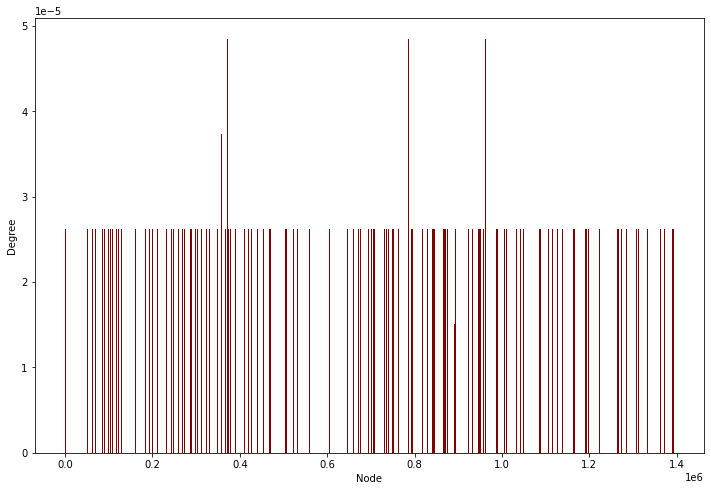

In [24]:
plt.figure(figsize=(12, 8)) 
key = list(pageRankCentrality.keys());
value = list(pageRankCentrality.values());

plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [25]:
print("Maximum value of Page Rank Centrality is",max(pageRankCentrality.values()))

Maximum value of Page Rank Centrality is 4.852713584974949e-05


**Closenness Centrality**

In [26]:
closenessCentrality = nx.closeness_centrality(G1)
closenessCentrality

{365233: 2.6231572320444888e-05,
 365273: 2.6231572320444888e-05,
 1134224: 2.6231572320444888e-05,
 1134225: 2.6231572320444888e-05,
 438431: 2.6231572320444888e-05,
 438432: 2.6231572320444888e-05,
 445705: 2.6231572320444888e-05,
 445718: 2.6231572320444888e-05,
 123873: 2.6231572320444888e-05,
 123874: 2.6231572320444888e-05,
 773090: 2.6231572320444888e-05,
 773313: 2.6231572320444888e-05,
 1088320: 2.6231572320444888e-05,
 1088603: 2.6231572320444888e-05,
 866313: 2.6231572320444888e-05,
 866309: 2.6231572320444888e-05,
 1291077: 2.6231572320444888e-05,
 1290910: 2.6231572320444888e-05,
 1131365: 2.6231572320444888e-05,
 1131363: 2.6231572320444888e-05,
 457805: 2.6231572320444888e-05,
 457804: 2.6231572320444888e-05,
 122558: 5.9021037721000995e-05,
 122553: 3.934735848066733e-05,
 40133: 2.6231572320444888e-05,
 1335238: 2.6231572320444888e-05,
 928054: 2.6231572320444888e-05,
 928261: 2.6231572320444888e-05,
 1273233: 2.6231572320444888e-05,
 1273239: 2.6231572320444888e-05,
 

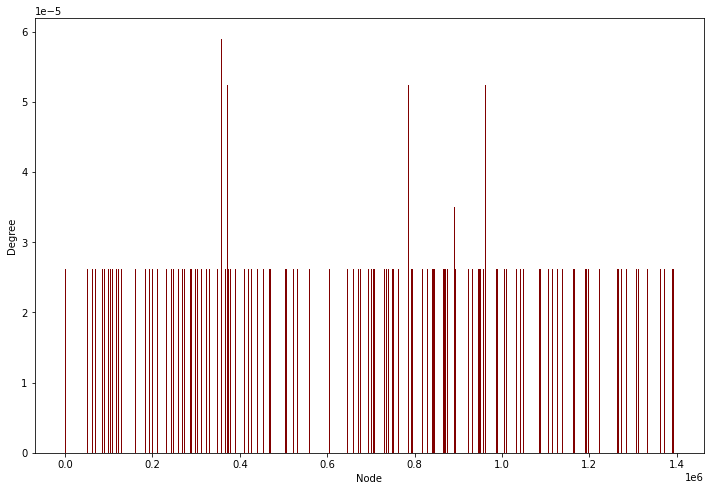

In [27]:
plt.figure(figsize=(12, 8)) 
key = list(closenessCentrality.keys());
value = list(closenessCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [28]:
print("Maximum value of Closeness Centrality is",max(closenessCentrality.values()))

Maximum value of Closeness Centrality is 5.9021037721000995e-05


**Betweenness Centrality**

In [33]:
betweennessCentrality = nx.betweenness_centrality(G1)
betweennessCentrality

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(12, 8)) 
key = list(betweennessCentrality.keys());
value = list(betweennessCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [ ]:
print("Maximum value of Betweenness Centrality is",max(betweennessCentrality.values()))

# **Clustering Coefficient**

In [30]:
localClusteringCoefficient=nx.clustering(G)
localClusteringCoefficient

{0: 0,
 1: 0,
 2: 0,
 29: 0,
 23: 0,
 32: 0,
 26: 0,
 34: 0,
 337: 0,
 358: 0,
 13: 0,
 24: 0,
 33: 0,
 53: 0,
 3: 0,
 4: 0,
 7: 0,
 40: 0,
 18: 0,
 19: 0,
 5: 0,
 16: 0,
 17: 0,
 39: 0,
 179: 0,
 6: 0,
 10: 0,
 11: 0,
 8: 0,
 9: 0,
 47: 0,
 20: 0,
 46: 0,
 178: 0,
 21: 0,
 12: 0,
 174: 0,
 1889: 0,
 22: 0,
 49: 0,
 173: 0,
 35: 0,
 14: 0,
 15: 0,
 25: 0,
 4730: 0,
 4666: 0,
 4697: 0,
 4740: 0,
 5484: 0,
 5504: 0,
 4701: 0,
 4732: 0,
 4670: 0,
 4696: 0.2,
 4723: 0.3333333333333333,
 4664: 0,
 4667: 0,
 175: 0,
 336: 0,
 335: 0,
 390: 0,
 4743: 0,
 4762: 0.16666666666666666,
 222: 0.16666666666666666,
 5499: 0,
 225: 0.16666666666666666,
 27: 0,
 28: 0,
 65: 0,
 67: 0,
 3456: 0,
 3472: 0,
 66: 0,
 1297: 0,
 1294: 0,
 3457: 0,
 30: 0,
 31: 0,
 87: 0,
 1581: 0,
 349: 0,
 388: 0,
 1585: 0,
 1594: 0,
 389: 0,
 347: 0,
 350: 0,
 36: 0,
 51: 0,
 176: 0,
 177: 0,
 37: 0,
 38: 0,
 61: 0,
 4783: 0.1,
 223: 0,
 224: 0,
 4772: 0,
 5215: 0,
 4782: 0,
 4796: 0,
 4773: 0,
 5048: 0,
 5050: 0,
 45: 0,


In [31]:
globalClusteringCoefficient = nx.average_clustering(G)
globalClusteringCoefficient

0.0470046960946403

In [32]:
reciprocity=nx.overall_reciprocity(G)
transitivity=nx.transitivity(G)

print(reciprocity)
print(transitivity)

0.0
0.060224199223599666
